In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as data

In [59]:
start = '2010-01-01'
end='2019-12-31'

df=data.DataReader('AAPL','yahoo',start,end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,70.027306
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.416679
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.389580
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.813286
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.337990


In [60]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452592
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553024
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564356
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459939
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447997


In [61]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


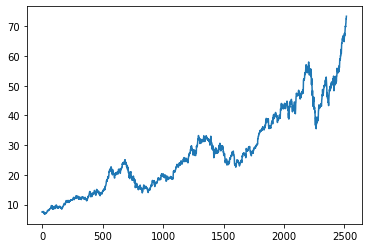

In [62]:
plt.plot(df.Close)

In [63]:
ma100=df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64

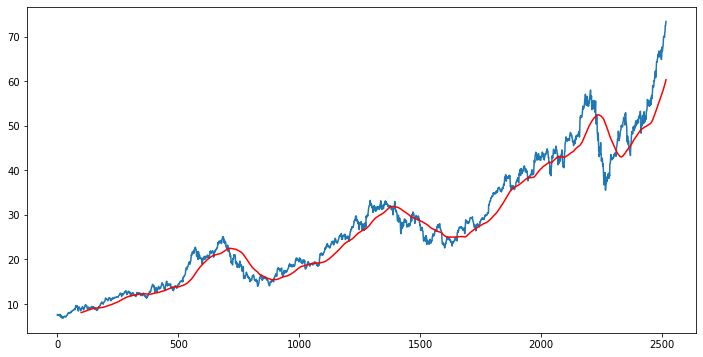

In [64]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'red')


In [65]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
2516    54.793137
Name: Close, Length: 2517, dtype: float64

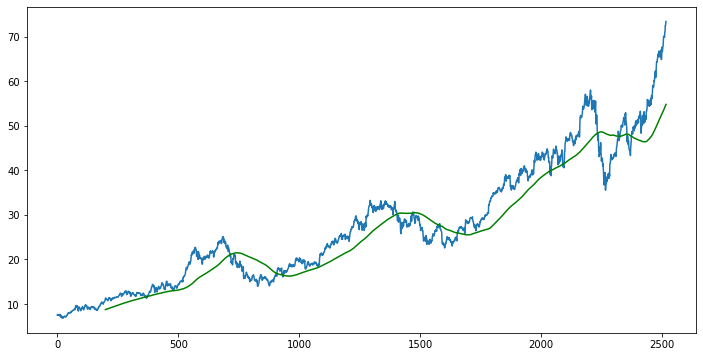

In [66]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma200,'green')

In [67]:
df.shape

(2517, 5)

In [68]:
# Splitting data into testing and splitting 
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(756, 1)


In [69]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [70]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [72]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [73]:
data_training_array.shape

(1761, 1)

In [86]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train=np.array(x_train),np.array(y_train)

In [87]:
x_train.shape

(1661, 100, 1)

In [84]:
#ml model
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM

In [88]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [89]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)              

In [90]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 10s 138ms/step - loss: 0.0607
Epoch 2/50
52/52 [==============================] - 7s 135ms/step - loss: 0.0129
Epoch 3/50
52/52 [==============================] - 7s 136ms/step - loss: 0.0094
Epoch 4/50
52/52 [==============================] - 7s 136ms/step - loss: 0.0088
Epoch 5/50
52/52 [==============================] - 7s 136ms/step - loss: 0.0083
Epoch 6/50
52/52 [==============================] - 7s 134ms/step - loss: 0.0085
Epoch 7/50
52/52 [==============================] - 6s 125ms/step - loss: 0.0081
Epoch 8/50
52/52 [==============================] - 6s 123ms/step - loss: 0.0068
Epoch 9/50
52/52 [==============================] - 6s 124ms/step - loss: 0.0066
Epoch 10/50
52/52 [==============================] - 6s 124ms/step - loss: 0.0069
Epoch 11/50
52/52 [==============================] - 6s 124ms/step - loss: 0.0067
Epoch 12/50
52/52 [==============================] - 7s 126ms/step - loss: 0.0069
Epoch 13/50
52/52 [=====

In [91]:
model.save('keras_model.h5')

In [92]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [95]:
data_training.tail(100)

,Close
1661,27.092501
1662,27.202499
1663,27.000000
1664,26.982500
1665,27.045000
...,...
1756,29.264999
1757,29.072500
1758,29.129999
1759,29.315001


In [96]:
past_100_days=data_training.tail(100)

In [97]:
final_df=past_100_days.append(data_testing,ignore_index=True)


In [98]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [100]:
input_data=scaler.fit_transform(final_df)

In [101]:
input_data.shape

(856, 1)

In [102]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [103]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [104]:
#Making Prediction
y_predicted=model.predict(x_test)

In [105]:
y_predicted.shape

(756, 1)

In [106]:
scaler.scale_

array([0.02099517])

In [107]:
scale_factor=1/0.02099517
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

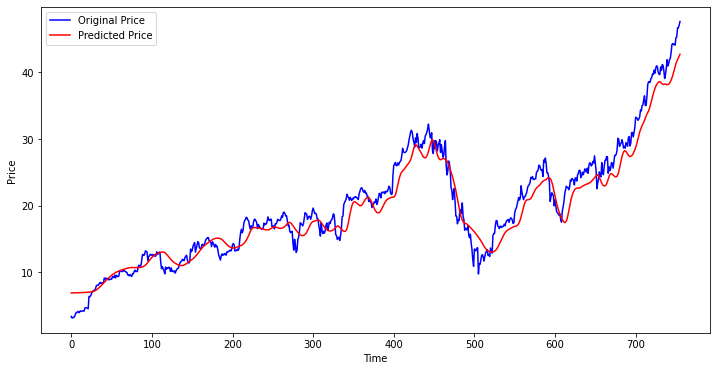

In [110]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()